Implementing a single input neuron

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
interactive_sesssion=tf.InteractiveSession()

In [41]:
input_value = tf.constant(0.5,name="input_value")

In [42]:
weight = tf.Variable(1.0,name="weight")

In [43]:
expected_output = tf.constant(0.0,name="expected_output")

In [44]:
model = tf.multiply(input_value, weight,"model") 

In [45]:
loss_function = (model - expected_output)**2

In [46]:
optim = tf.train.GradientDescentOptimizer(learning_rate=0.025)

In [47]:
train_step=optim.minimize(loss_function)

In [48]:
for value in [input_value,weight,expected_output,model,loss_function]:     
    tf.summary.scalar(value.op.name,value)

In [49]:
summaries = tf.summary.merge_all()

In [50]:
summary_writer = tf.summary.FileWriter('log_simple_stats',interactive_sesssion.graph)

In [51]:
init_op=tf.global_variables_initializer()

In [52]:
interactive_sesssion.run(init_op)

In [53]:
scatter_output_x=[]
scatter_output_y=[]

In [54]:
for i in range(500):
    interactive_sesssion.run(train_step)
    loss=interactive_sesssion.run(loss_function)
    w=interactive_sesssion.run(weight)
    print("loss is %f. weight is %f"%(loss,w))
    scatter_output_x.append(i)
    scatter_output_y.append(w)
    summary_writer.add_summary(interactive_sesssion.run(summaries),i) 

loss is 0.243789. weight is 0.987500
loss is 0.237732. weight is 0.975156
loss is 0.231826. weight is 0.962967
loss is 0.226067. weight is 0.950930
loss is 0.220450. weight is 0.939043
loss is 0.214974. weight is 0.927305
loss is 0.209633. weight is 0.915714
loss is 0.204425. weight is 0.904267
loss is 0.199346. weight is 0.892964
loss is 0.194394. weight is 0.881802
loss is 0.189564. weight is 0.870779
loss is 0.184855. weight is 0.859895
loss is 0.180262. weight is 0.849146
loss is 0.175784. weight is 0.838532
loss is 0.171417. weight is 0.828050
loss is 0.167158. weight is 0.817699
loss is 0.163005. weight is 0.807478
loss is 0.158956. weight is 0.797385
loss is 0.155006. weight is 0.787417
loss is 0.151156. weight is 0.777575
loss is 0.147400. weight is 0.767855
loss is 0.143738. weight is 0.758257
loss is 0.140167. weight is 0.748779
loss is 0.136685. weight is 0.739419
loss is 0.133289. weight is 0.730176
loss is 0.129978. weight is 0.721049
loss is 0.126749. weight is 0.712036
l

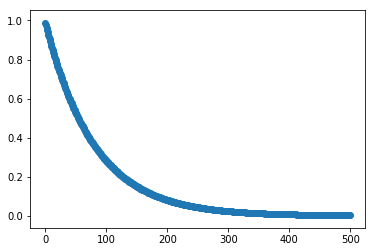

In [55]:
plt.scatter(scatter_output_x,scatter_output_y)

running '$tensorboard --logdir= log_simple_stats' will triger tensorboard